# Using Spotify's Web API to compare this 2021 Season's "Christmas Classics" and "New Music Holiday"

OBJECTIVE: What similarities or differences can we see between these playlists from Spotify's given audio features from their web API?

Restrictions apply with API Limits of 50 items. CREDITS: Inspired from Steven Morse's 'Exploring the Spotify API in Python' as a very helpful intro for data-focused projects.

In [ ]:
import os
import requests
import json
import pandas as pd


CLIENT_ID=os.getenv('CLIENT_ID')
CLIENT_SECRET=os.getenv('CLIENT_SECRET')

pass access token. POST request with my client credentials and save response

In [141]:
AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [142]:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [143]:
# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

## Get the data

New Music Holiday Playlist vs Christmas Classics Playlist

New Music Holiday: https://open.spotify.com/playlist/37i9dQZF1DX5vMTfJy5XKE

Christmas Classics: https://open.spotify.com/playlist/37i9dQZF1DX6R7QUWePReA

curl --request GET \
  --url https://api.spotify.com/v1/playlists/playlist_id \
  --header 'Authorization: ' \
  --header 'Content-Type: application/json'

## New Music Holiday Playlist - create df

In [102]:
# New Holiday playlist ID from the URI
new_id = '37i9dQZF1DX5vMTfJy5XKE'

# pull playlist
new_r = requests.get(BASE_URL + 'playlists/' + new_id + '/tracks', 
                 headers=headers, 
                 params={'include_groups': 'track','limit': 50})
new_d = new_r.json()

In [103]:
print(type(new_d))

<class 'dict'>


In [174]:
#add track_id, track_name to list of list
new_list = []

for i, track in enumerate(new_d['items']):
    track_id = track['track']['id']
    track_name = track['track']['name']
    popularity = track['track']['popularity']
    new_list.append([track_id, track_name, popularity])

In [175]:
#create dataframe from list of list

df_track = pd.DataFrame(new_list, columns=['track_id', 'track_name','popularity'])

print(df_track.columns)
print(df_track.index)
df_track.head(10)

Index(['track_id', 'track_name', 'popularity'], dtype='object')
RangeIndex(start=0, stop=50, step=1)


,track_id,track_name,popularity
0,2ZAEbbKPNf1Wv1fifB2nyd,You Deserve It All,68
1,2O3MQ6H3gjrIWDcpeTrikT,"Santa, Can’t You Hear Me",68
2,5L8OxPOln5z2D1rfutPZy4,Have Yourself A Merry Little Christmas,52
3,2wkAdxI86skFLB5GuFazzL,Please Come Home for Christmas,62
4,30QRKfHBopZn6UNqqSJQ9O,The Christmas Sweater,67
5,1QaOGWzjEOhDHVAvgig22X,Kiss Me It's Christmas (feat. Ne-Yo),60
6,2Z0htiPiNK8IiJDYTD51hr,Officially Christmas,60
7,7Ao5aouOwI94DuwcXa5X1i,Jingle Bell Rock -Spotify Singles Holiday,61
8,7dg8ikrVSTkpu8RVl2NkAc,Frosty The Snowman (feat. Alessia Cara),65
9,4nEJzW7MkSF8ojY7WJnoPt,Glow,59


In [115]:
# use different endpoint to get track audio features
track_ids = list(df_track['track_id'])
columns_ = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']
values = []
for track_id in track_ids:
    # pull playlist
    new_tracks_r = requests.get('https://api.spotify.com/v1/audio-features/' + track_id, 
                     headers=headers, 
                     params={'include_groups': 'track','limit': 50})
    new_tracks_d = new_tracks_r.json()
    curr_val = []
    for key, value in new_tracks_d.items():
        curr_val.append(value)
        
    values.append(curr_val)

    

In [116]:
df_audio_data = pd.DataFrame(values, columns=columns_)
df_audio_data.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.524,0.739,0,-6.681,1,0.0386,0.2150,0.000000,0.0636,0.480,83.095,audio_features,2ZAEbbKPNf1Wv1fifB2nyd,spotify:track:2ZAEbbKPNf1Wv1fifB2nyd,https://api.spotify.com/v1/tracks/2ZAEbbKPNf1W...,https://api.spotify.com/v1/audio-analysis/2ZAE...,198627,4
1,0.495,0.896,11,-2.381,1,0.0331,0.0050,0.000000,0.3530,0.462,146.040,audio_features,2O3MQ6H3gjrIWDcpeTrikT,spotify:track:2O3MQ6H3gjrIWDcpeTrikT,https://api.spotify.com/v1/tracks/2O3MQ6H3gjrI...,https://api.spotify.com/v1/audio-analysis/2O3M...,242645,4
2,0.268,0.191,5,-10.639,1,0.0304,0.9360,0.000000,0.1090,0.249,77.665,audio_features,5L8OxPOln5z2D1rfutPZy4,spotify:track:5L8OxPOln5z2D1rfutPZy4,https://api.spotify.com/v1/tracks/5L8OxPOln5z2...,https://api.spotify.com/v1/audio-analysis/5L8O...,144440,4
3,0.495,0.550,4,-4.907,1,0.0276,0.3040,0.000015,0.0797,0.576,179.908,audio_features,2wkAdxI86skFLB5GuFazzL,spotify:track:2wkAdxI86skFLB5GuFazzL,https://api.spotify.com/v1/tracks/2wkAdxI86skF...,https://api.spotify.com/v1/audio-analysis/2wkA...,177080,3
4,0.641,0.766,8,-5.310,1,0.0369,0.0114,0.000000,0.2610,0.551,123.999,audio_features,30QRKfHBopZn6UNqqSJQ9O,spotify:track:30QRKfHBopZn6UNqqSJQ9O,https://api.spotify.com/v1/tracks/30QRKfHBopZn...,https://api.spotify.com/v1/audio-analysis/30QR...,223672,4
5,0.470,0.569,2,-5.845,1,0.0319,0.2320,0.000000,0.2740,0.663,106.900,audio_features,1QaOGWzjEOhDHVAvgig22X,spotify:track:1QaOGWzjEOhDHVAvgig22X,https://api.spotify.com/v1/tracks/1QaOGWzjEOhD...,https://api.spotify.com/v1/audio-analysis/1QaO...,215059,4
6,0.655,0.677,6,-4.278,1,0.0326,0.1460,0.000000,0.1310,0.620,127.041,audio_features,2Z0htiPiNK8IiJDYTD51hr,spotify:track:2Z0htiPiNK8IiJDYTD51hr,https://api.spotify.com/v1/tracks/2Z0htiPiNK8I...,https://api.spotify.com/v1/audio-analysis/2Z0h...,178387,4
7,0.629,0.657,4,-7.771,1,0.0313,0.1690,0.000027,0.4540,0.603,120.013,audio_features,7Ao5aouOwI94DuwcXa5X1i,spotify:track:7Ao5aouOwI94DuwcXa5X1i,https://api.spotify.com/v1/tracks/7Ao5aouOwI94...,https://api.spotify.com/v1/audio-analysis/7Ao5...,142893,4
8,0.595,0.386,5,-6.442,1,0.0377,0.4550,0.000000,0.1310,0.864,145.059,audio_features,7dg8ikrVSTkpu8RVl2NkAc,spotify:track:7dg8ikrVSTkpu8RVl2NkAc,https://api.spotify.com/v1/tracks/7dg8ikrVSTkp...,https://api.spotify.com/v1/audio-analysis/7dg8...,137093,4
9,0.638,0.830,11,-3.936,0,0.0671,0.0524,0.000000,0.3020,0.610,145.967,audio_features,4nEJzW7MkSF8ojY7WJnoPt,spotify:track:4nEJzW7MkSF8ojY7WJnoPt,https://api.spotify.com/v1/tracks/4nEJzW7MkSF8...,https://api.spotify.com/v1/audio-analysis/4nEJ...,198280,4


In [185]:
df_new = df_track.merge(df_audio_data, left_on='track_id', right_on='id')
df_new.head()

,track_id,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,2ZAEbbKPNf1Wv1fifB2nyd,You Deserve It All,68,0.524,0.739,0,-6.681,1,0.0386,0.2150,...,0.0636,0.480,83.095,audio_features,2ZAEbbKPNf1Wv1fifB2nyd,spotify:track:2ZAEbbKPNf1Wv1fifB2nyd,https://api.spotify.com/v1/tracks/2ZAEbbKPNf1W...,https://api.spotify.com/v1/audio-analysis/2ZAE...,198627,4
1,2O3MQ6H3gjrIWDcpeTrikT,"Santa, Can’t You Hear Me",68,0.495,0.896,11,-2.381,1,0.0331,0.0050,...,0.3530,0.462,146.040,audio_features,2O3MQ6H3gjrIWDcpeTrikT,spotify:track:2O3MQ6H3gjrIWDcpeTrikT,https://api.spotify.com/v1/tracks/2O3MQ6H3gjrI...,https://api.spotify.com/v1/audio-analysis/2O3M...,242645,4
2,5L8OxPOln5z2D1rfutPZy4,Have Yourself A Merry Little Christmas,52,0.268,0.191,5,-10.639,1,0.0304,0.9360,...,0.1090,0.249,77.665,audio_features,5L8OxPOln5z2D1rfutPZy4,spotify:track:5L8OxPOln5z2D1rfutPZy4,https://api.spotify.com/v1/tracks/5L8OxPOln5z2...,https://api.spotify.com/v1/audio-analysis/5L8O...,144440,4
3,2wkAdxI86skFLB5GuFazzL,Please Come Home for Christmas,62,0.495,0.550,4,-4.907,1,0.0276,0.3040,...,0.0797,0.576,179.908,audio_features,2wkAdxI86skFLB5GuFazzL,spotify:track:2wkAdxI86skFLB5GuFazzL,https://api.spotify.com/v1/tracks/2wkAdxI86skF...,https://api.spotify.com/v1/audio-analysis/2wkA...,177080,3
4,30QRKfHBopZn6UNqqSJQ9O,The Christmas Sweater,67,0.641,0.766,8,-5.310,1,0.0369,0.0114,...,0.2610,0.551,123.999,audio_features,30QRKfHBopZn6UNqqSJQ9O,spotify:track:30QRKfHBopZn6UNqqSJQ9O,https://api.spotify.com/v1/tracks/30QRKfHBopZn...,https://api.spotify.com/v1/audio-analysis/30QR...,223672,4


In [114]:
columns = []
values = []
for key, value in new_tracks_d.items():
    columns.append(key)
    values.append(value)
    
print(columns)
print(values)

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']
[0.595, 0.386, 5, -6.442, 1, 0.0377, 0.455, 0, 0.131, 0.864, 145.059, 'audio_features', '7dg8ikrVSTkpu8RVl2NkAc', 'spotify:track:7dg8ikrVSTkpu8RVl2NkAc', 'https://api.spotify.com/v1/tracks/7dg8ikrVSTkpu8RVl2NkAc', 'https://api.spotify.com/v1/audio-analysis/7dg8ikrVSTkpu8RVl2NkAc', 137093, 4]


In [ ]:
#add audio features to list of list
new_list = []

for i, track in enumerate(new_d['items']):
    track_id = track['track']['id']
    track_name = track['track']['name']
    new_list.append([track_id, track_name])

In [ ]:
#create df from track features
df_track = pd.DataFrame(new_list, columns=['track_id', 'track_name'])

print(df_track.columns)
print(df_track.index)
df_track.head(10)

In [64]:
def pretty(d, indent=0):
   for key, value in d.items():
      print('\t' * indent + str(key))
      if isinstance(value, dict):
         pretty(value, indent+1)
      else:
         print('\t' * (indent+1) + str(value))

## Classic Christmas Playlist - create df

In [177]:
classic_id = '37i9dQZF1DX6R7QUWePReA'

classic_r = requests.get(BASE_URL + 'playlists/' + classic_id + '/tracks',
                        headers=headers, 
                 params={'include_groups': 'track','limit': 50})

classic_d = classic_r.json()

In [151]:
print(type(classic_d))

<class 'dict'>


In [168]:
#add track_id, track_name to list of list
classic_list = []

for i, track in enumerate(classic_d['items']):
    track_id = track['track']['id']
    track_name = track['track']['name']
    popularity = track['track']['popularity']
    classic_list.append([track_id, track_name, popularity])
    

In [170]:
#create dataframe from list of list

df_classic_track = pd.DataFrame(classic_list, columns=['track_id', 'track_name', 'popularity'])

print(df_classic_track.columns)
print(df_classic_track.index)
df_classic_track.head(10)

Index(['track_id', 'track_name', 'popularity'], dtype='object')
RangeIndex(start=0, stop=50, step=1)


,track_id,track_name,popularity
0,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),83
1,5hslUAKq9I9CG2bAulFkHN,It's the Most Wonderful Time of the Year,84
2,2EjXfH91m7f8HiJN1yQg97,Rockin' Around The Christmas Tree,86
3,7vQbuQcyTflfCIOu3Uzzya,Jingle Bell Rock,86
4,46pF1zFimM582ss1PrMy68,Christmas (Baby Please Come Home),74
5,2pXpURmn6zC5ZYDMms6fwa,It's Beginning to Look a Lot Like Christmas (w...,80
6,77khP2fIVhSW23NwxrRluh,A Holly Jolly Christmas - Single Version,78
7,0oPdaY4dXtc3ZsaG17V972,Feliz Navidad,78
8,5ASM6Qjiav2xPe7gRkQMsQ,Sleigh Ride,81
9,4yV74JwUiz7YS59ReFtI3D,Let It Snow! Let It Snow! Let It Snow! - 78rpm...,0


In [171]:
# use different endpoint to get track audio features
track_ids = list(df_classic_track['track_id'])
columns_ = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']
classic_values = []

for track_id in track_ids:
    # pull playlist
    classic_tracks_r = requests.get('https://api.spotify.com/v1/audio-features/' + track_id, 
                     headers=headers, 
                     params={'include_groups': 'track','limit': 50})
    classic_tracks_d = classic_tracks_r.json()
    curr_val = []
    for key, value in classic_tracks_d.items():
        curr_val.append(value)
        
    classic_values.append(curr_val)

    

In [172]:
df_classic_audio_data = pd.DataFrame(classic_values, columns=columns_)
df_classic_audio_data.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.319,0.210,1,-15.231,1,0.0341,0.920,0.000081,0.1380,0.209,78.696,audio_features,4PS1e8f2LvuTFgUs1Cn3ON,spotify:track:4PS1e8f2LvuTFgUs1Cn3ON,https://api.spotify.com/v1/tracks/4PS1e8f2LvuT...,https://api.spotify.com/v1/audio-analysis/4PS1...,192160,4
1,0.240,0.598,7,-8.435,1,0.0369,0.766,0.000000,0.1170,0.776,201.629,audio_features,5hslUAKq9I9CG2bAulFkHN,spotify:track:5hslUAKq9I9CG2bAulFkHN,https://api.spotify.com/v1/tracks/5hslUAKq9I9C...,https://api.spotify.com/v1/audio-analysis/5hsl...,151933,3
2,0.589,0.472,8,-8.749,1,0.0502,0.614,0.000000,0.5050,0.898,67.196,audio_features,2EjXfH91m7f8HiJN1yQg97,spotify:track:2EjXfH91m7f8HiJN1yQg97,https://api.spotify.com/v1/tracks/2EjXfH91m7f8...,https://api.spotify.com/v1/audio-analysis/2EjX...,126267,4
3,0.754,0.424,2,-8.463,1,0.0363,0.643,0.000000,0.0652,0.806,119.705,audio_features,7vQbuQcyTflfCIOu3Uzzya,spotify:track:7vQbuQcyTflfCIOu3Uzzya,https://api.spotify.com/v1/tracks/7vQbuQcyTflf...,https://api.spotify.com/v1/audio-analysis/7vQb...,130973,4
4,0.325,0.759,8,-7.146,1,0.0530,0.395,0.000362,0.0773,0.360,126.627,audio_features,46pF1zFimM582ss1PrMy68,spotify:track:46pF1zFimM582ss1PrMy68,https://api.spotify.com/v1/tracks/46pF1zFimM58...,https://api.spotify.com/v1/audio-analysis/46pF...,166453,4
5,0.724,0.276,7,-12.250,1,0.0599,0.760,0.000000,0.1160,0.718,112.874,audio_features,2pXpURmn6zC5ZYDMms6fwa,spotify:track:2pXpURmn6zC5ZYDMms6fwa,https://api.spotify.com/v1/tracks/2pXpURmn6zC5...,https://api.spotify.com/v1/audio-analysis/2pXp...,155933,4
6,0.683,0.375,0,-13.056,1,0.0303,0.579,0.000000,0.0760,0.888,140.467,audio_features,77khP2fIVhSW23NwxrRluh,spotify:track:77khP2fIVhSW23NwxrRluh,https://api.spotify.com/v1/tracks/77khP2fIVhSW...,https://api.spotify.com/v1/audio-analysis/77kh...,135533,4
7,0.513,0.831,2,-9.004,1,0.0383,0.550,0.000000,0.3360,0.963,148.837,audio_features,0oPdaY4dXtc3ZsaG17V972,spotify:track:0oPdaY4dXtc3ZsaG17V972,https://api.spotify.com/v1/tracks/0oPdaY4dXtc3...,https://api.spotify.com/v1/audio-analysis/0oPd...,182067,4
8,0.529,0.772,2,-7.013,1,0.0287,0.403,0.000002,0.3160,0.853,91.751,audio_features,5ASM6Qjiav2xPe7gRkQMsQ,spotify:track:5ASM6Qjiav2xPe7gRkQMsQ,https://api.spotify.com/v1/tracks/5ASM6Qjiav2x...,https://api.spotify.com/v1/audio-analysis/5ASM...,181267,4
9,0.603,0.321,2,-11.489,1,0.0599,0.881,0.000000,0.3400,0.844,143.104,audio_features,4yV74JwUiz7YS59ReFtI3D,spotify:track:4yV74JwUiz7YS59ReFtI3D,https://api.spotify.com/v1/tracks/4yV74JwUiz7Y...,https://api.spotify.com/v1/audio-analysis/4yV7...,155600,4


In [188]:
df_classic = df_classic_track.merge(df_classic_audio_data, left_on='track_id', right_on='id')
df_classic.head()

,track_id,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),83,0.319,0.210,1,-15.231,1,0.0341,0.920,...,0.1380,0.209,78.696,audio_features,4PS1e8f2LvuTFgUs1Cn3ON,spotify:track:4PS1e8f2LvuTFgUs1Cn3ON,https://api.spotify.com/v1/tracks/4PS1e8f2LvuT...,https://api.spotify.com/v1/audio-analysis/4PS1...,192160,4
1,5hslUAKq9I9CG2bAulFkHN,It's the Most Wonderful Time of the Year,84,0.240,0.598,7,-8.435,1,0.0369,0.766,...,0.1170,0.776,201.629,audio_features,5hslUAKq9I9CG2bAulFkHN,spotify:track:5hslUAKq9I9CG2bAulFkHN,https://api.spotify.com/v1/tracks/5hslUAKq9I9C...,https://api.spotify.com/v1/audio-analysis/5hsl...,151933,3
2,2EjXfH91m7f8HiJN1yQg97,Rockin' Around The Christmas Tree,86,0.589,0.472,8,-8.749,1,0.0502,0.614,...,0.5050,0.898,67.196,audio_features,2EjXfH91m7f8HiJN1yQg97,spotify:track:2EjXfH91m7f8HiJN1yQg97,https://api.spotify.com/v1/tracks/2EjXfH91m7f8...,https://api.spotify.com/v1/audio-analysis/2EjX...,126267,4
3,7vQbuQcyTflfCIOu3Uzzya,Jingle Bell Rock,86,0.754,0.424,2,-8.463,1,0.0363,0.643,...,0.0652,0.806,119.705,audio_features,7vQbuQcyTflfCIOu3Uzzya,spotify:track:7vQbuQcyTflfCIOu3Uzzya,https://api.spotify.com/v1/tracks/7vQbuQcyTflf...,https://api.spotify.com/v1/audio-analysis/7vQb...,130973,4
4,46pF1zFimM582ss1PrMy68,Christmas (Baby Please Come Home),74,0.325,0.759,8,-7.146,1,0.0530,0.395,...,0.0773,0.360,126.627,audio_features,46pF1zFimM582ss1PrMy68,spotify:track:46pF1zFimM582ss1PrMy68,https://api.spotify.com/v1/tracks/46pF1zFimM58...,https://api.spotify.com/v1/audio-analysis/46pF...,166453,4


# Compare playlists

In [189]:
df_classic.head(3)

,track_id,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),83,0.319,0.210,1,-15.231,1,0.0341,0.920,...,0.138,0.209,78.696,audio_features,4PS1e8f2LvuTFgUs1Cn3ON,spotify:track:4PS1e8f2LvuTFgUs1Cn3ON,https://api.spotify.com/v1/tracks/4PS1e8f2LvuT...,https://api.spotify.com/v1/audio-analysis/4PS1...,192160,4
1,5hslUAKq9I9CG2bAulFkHN,It's the Most Wonderful Time of the Year,84,0.240,0.598,7,-8.435,1,0.0369,0.766,...,0.117,0.776,201.629,audio_features,5hslUAKq9I9CG2bAulFkHN,spotify:track:5hslUAKq9I9CG2bAulFkHN,https://api.spotify.com/v1/tracks/5hslUAKq9I9C...,https://api.spotify.com/v1/audio-analysis/5hsl...,151933,3
2,2EjXfH91m7f8HiJN1yQg97,Rockin' Around The Christmas Tree,86,0.589,0.472,8,-8.749,1,0.0502,0.614,...,0.505,0.898,67.196,audio_features,2EjXfH91m7f8HiJN1yQg97,spotify:track:2EjXfH91m7f8HiJN1yQg97,https://api.spotify.com/v1/tracks/2EjXfH91m7f8...,https://api.spotify.com/v1/audio-analysis/2EjX...,126267,4


In [193]:
#Sort by most popular

top_10_classic = df_classic.sort_values(by=['popularity'],ascending=[False]).head(10)

In [195]:
# summary statistics for audio features and popularity

df_classic.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,53.400000,0.497560,0.391040,4.900000,-11.894340,0.840000,0.068766,0.692300,0.001126,0.224302,0.571040,121.357280,168358.420000,3.800000
std,32.789993,0.181318,0.223229,3.382126,3.378883,0.370328,0.128069,0.240957,0.004392,0.167428,0.262245,36.592661,47413.057938,0.451754
min,0.000000,0.125000,0.103000,0.000000,-22.507000,0.000000,0.027600,0.108000,0.000000,0.050200,0.107000,46.718000,85227.000000,3.000000
25%,10.750000,0.349000,0.204000,2.000000,-14.680250,1.000000,0.033000,0.584000,0.000000,0.119250,0.368750,93.337250,141643.500000,4.000000
50%,69.000000,0.530500,0.316500,5.000000,-11.555500,1.000000,0.038900,0.754500,0.000000,0.188500,0.569500,121.005500,163453.000000,4.000000
75%,74.000000,0.618750,0.579750,7.750000,-9.395750,1.000000,0.056525,0.895750,0.000054,0.267250,0.797500,143.802500,182517.000000,4.000000
max,86.000000,0.834000,0.879000,11.000000,-5.377000,1.000000,0.905000,0.994000,0.029200,0.781000,0.976000,206.130000,315707.000000,5.000000


In [186]:
df_new.head(3)

,track_id,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,2ZAEbbKPNf1Wv1fifB2nyd,You Deserve It All,68,0.524,0.739,0,-6.681,1,0.0386,0.215,...,0.0636,0.480,83.095,audio_features,2ZAEbbKPNf1Wv1fifB2nyd,spotify:track:2ZAEbbKPNf1Wv1fifB2nyd,https://api.spotify.com/v1/tracks/2ZAEbbKPNf1W...,https://api.spotify.com/v1/audio-analysis/2ZAE...,198627,4
1,2O3MQ6H3gjrIWDcpeTrikT,"Santa, Can’t You Hear Me",68,0.495,0.896,11,-2.381,1,0.0331,0.005,...,0.3530,0.462,146.040,audio_features,2O3MQ6H3gjrIWDcpeTrikT,spotify:track:2O3MQ6H3gjrIWDcpeTrikT,https://api.spotify.com/v1/tracks/2O3MQ6H3gjrI...,https://api.spotify.com/v1/audio-analysis/2O3M...,242645,4
2,5L8OxPOln5z2D1rfutPZy4,Have Yourself A Merry Little Christmas,52,0.268,0.191,5,-10.639,1,0.0304,0.936,...,0.1090,0.249,77.665,audio_features,5L8OxPOln5z2D1rfutPZy4,spotify:track:5L8OxPOln5z2D1rfutPZy4,https://api.spotify.com/v1/tracks/5L8OxPOln5z2...,https://api.spotify.com/v1/audio-analysis/5L8O...,144440,4


In [196]:
df_new.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,56.220000,0.553920,0.526924,5.760000,-7.380720,0.840000,0.041232,0.404883,0.018852,0.178950,0.471498,119.026880,189437.100000,3.800000
std,9.056039,0.142131,0.224661,3.431903,3.452497,0.370328,0.018523,0.337413,0.132209,0.127372,0.218659,29.168671,38788.095182,0.638877
min,12.000000,0.226000,0.043200,0.000000,-25.884000,0.000000,0.027300,0.000065,0.000000,0.057800,0.060900,66.297000,116677.000000,1.000000
25%,51.250000,0.495000,0.313000,4.000000,-8.548750,1.000000,0.031900,0.104650,0.000000,0.097925,0.322750,93.068500,161251.750000,4.000000
50%,57.000000,0.579000,0.552500,6.000000,-6.689000,1.000000,0.035350,0.270500,0.000000,0.128500,0.475500,122.034000,188139.000000,4.000000
75%,61.000000,0.637000,0.674000,8.000000,-5.832250,1.000000,0.040800,0.785500,0.000004,0.253500,0.617500,142.591000,211718.250000,4.000000
max,70.000000,0.932000,0.949000,11.000000,-1.418000,1.000000,0.130000,0.978000,0.935000,0.756000,0.970000,179.908000,308000.000000,4.000000


Quick looks: 
    
Similarities: 
* Very similary in having higher MODE(minor or major) representing song's being in major chords. This can be a loosely understood chord use for the Holiday sound.

# Some Visualizations

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

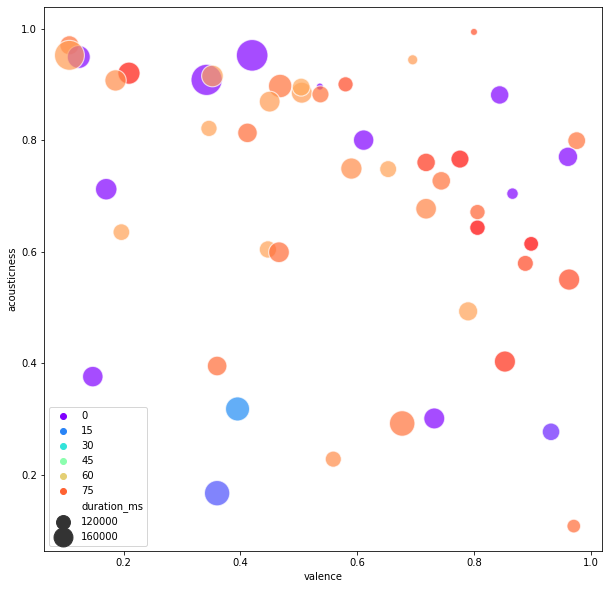

In [184]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=df_classic_music, x='valence', y='acousticness', 
                     hue='popularity', palette='rainbow', 
                     size='duration_ms', sizes=(50,1000), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:10], labs[1:10], loc='best', title=None)

Acousticness (accoustic or not) vs Valence(happy or sad) with colors representing Popularity and the size of circles representing duration of song. 

For Spotify's Classic Christmas, most songs cluster around being close to acoustic features with an even spread around valence. 
Deeper colors give a quick snapshot of songs being either very popular or not played much during the holiday season. 

Reasons around popularity are a potential reason to dive deeper into for where their placement in the playlist is, content, or historical popularity.

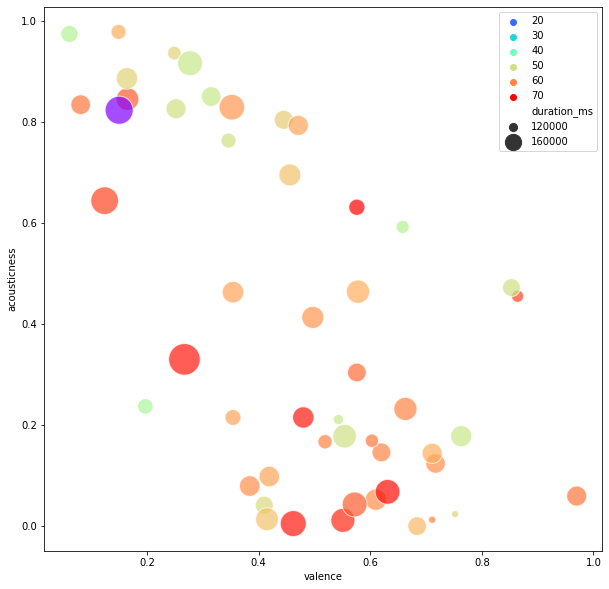

In [187]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=df_new, x='valence', y='acousticness', 
                     hue='popularity', palette='rainbow', 
                     size='duration_ms', sizes=(50,1000), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:10], labs[1:10], loc='best', title=None)

Same chart layout as above. 

For Spotify's New Music Holiday, we are hoping to point out from a general view for stricking differences and what can be defined or measured in the differences. 

The newer songs have much lower acousticness features, and more densely cluster around a neutral valence. Songs that tend to be on a low valence or sad are highly acoustic. These could be new stylistic choice representing much more of today's trends then a comparison to the past classics. 

Songs have smaller STD in popularity, and are closer in average popularity throughout the playlist. Compared to the Christmas Classics selections, they were explicit in their popularity numbers. 

In comparison, we could look into the popularity of the playlist id's themselves and carry this weight over. 

All in all, the Spotify audio features were helpful to delineate the average mood and tones of songs between the holiday choices!